In [1]:
# 数据处理及可视化
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 算法
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
# 训练
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [32]:
train_data = pd.read_csv("datasets/train.csv")
test_data = pd.read_csv("datasets/test.csv")
gender_submission = pd.read_csv("datasets/gender_submission.csv")

In [4]:
import feature_engineering

In [33]:
import importlib
importlib.reload(feature_engineering)

# 特征工程
train_data, test_data = feature_engineering.feature_engineering(train_data, test_data)
train_data.head(11)

,Survived,Pclass,Sex,Family_size,dead_family,live_family,deadfamily_man,deadfamily_woman,Title,FareBin,AgeBin
0,0,3,0,1,0,0,1,0,1,0,1
1,1,1,1,1,0,0,0,1,3,4,2
2,1,3,1,0,0,0,0,0,2,1,1
3,1,1,1,1,0,0,0,1,3,4,2
4,0,3,0,0,0,0,0,0,1,1,2
5,0,3,0,0,0,0,0,0,1,1,1
6,0,1,0,0,0,0,1,0,1,4,3
7,0,3,0,4,1,0,0,0,4,2,0
8,1,3,1,2,0,0,0,1,3,2,1
9,1,2,1,1,0,0,0,1,3,3,0


In [34]:
y = train_data["Survived"]
train_x, val_x, train_y, val_y = train_test_split(train_data.drop(["Survived"], axis=1), y, test_size=0.2, random_state=0)

In [36]:
# def get_score(c=67):
clf = SVC(C=3, probability=True)
clf.fit(train_x, train_y)
print(clf.score(val_x, val_y))

0.888268156424581


In [35]:
svc_grid = GridSearchCV(SVC(), {"C": [i for i in range(1, 101)]}, cv=3)
svc_grid.fit(train_data.drop(["Survived"], axis=1), y)
svc_grid.best_params_

{'C': 3}

In [10]:
get_score(5)

1.0


In [ ]:
0.88268156424581
0.8938547486033519

In [29]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Program Files\\Python37\\Lib\\site-packages\\matplotlib\\pyplot.py'>

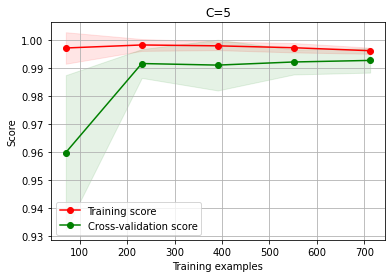

In [30]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(SVC(C=5), "C=5", train_data.drop(["Survived"], axis=1), y, cv=cv)

In [31]:
ids = gender_submission.PassengerId
predictions = clf.predict(test_data)
file_name = "e://submission_for_titanic_20200707003.csv"

output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
output.to_csv(file_name, index=False)